In [1]:
from load_modules import *
import copy
import pickle

In [2]:
# Our incorrect
saved_NN = "../../data/Raman_Mouse/saved_neural_network_2023-04-26 18-03-38.413049"
with open(f"{saved_NN}//stats.pickle", 'rb') as handle:
    data_Our = pickle.load(handle)
    
# ALS
saved_NN = "../../data/Raman_Mouse/saved_neural_network_2023-04-26 16-29-33.000387"
with open(f"{saved_NN}//stats.pickle", 'rb') as handle:
    data_ALS = pickle.load(handle)
    
# airPLS incorrect
saved_NN = "../../data/Raman_Mouse/saved_neural_network_2023-04-26 17-05-45.248411"
with open(f"{saved_NN}//stats.pickle", 'rb') as handle:
    data_airPLS = pickle.load(handle)

In [25]:
print(data_Our.keys())
len(data_Our['MSE photo']) / len(data_Our['validation_loss'])

dict_keys(['train_loss', 'smoothness', 'compared_grad', '% error', 'MSE photo', 'MSE raman', 'validation_loss'])


2696.0

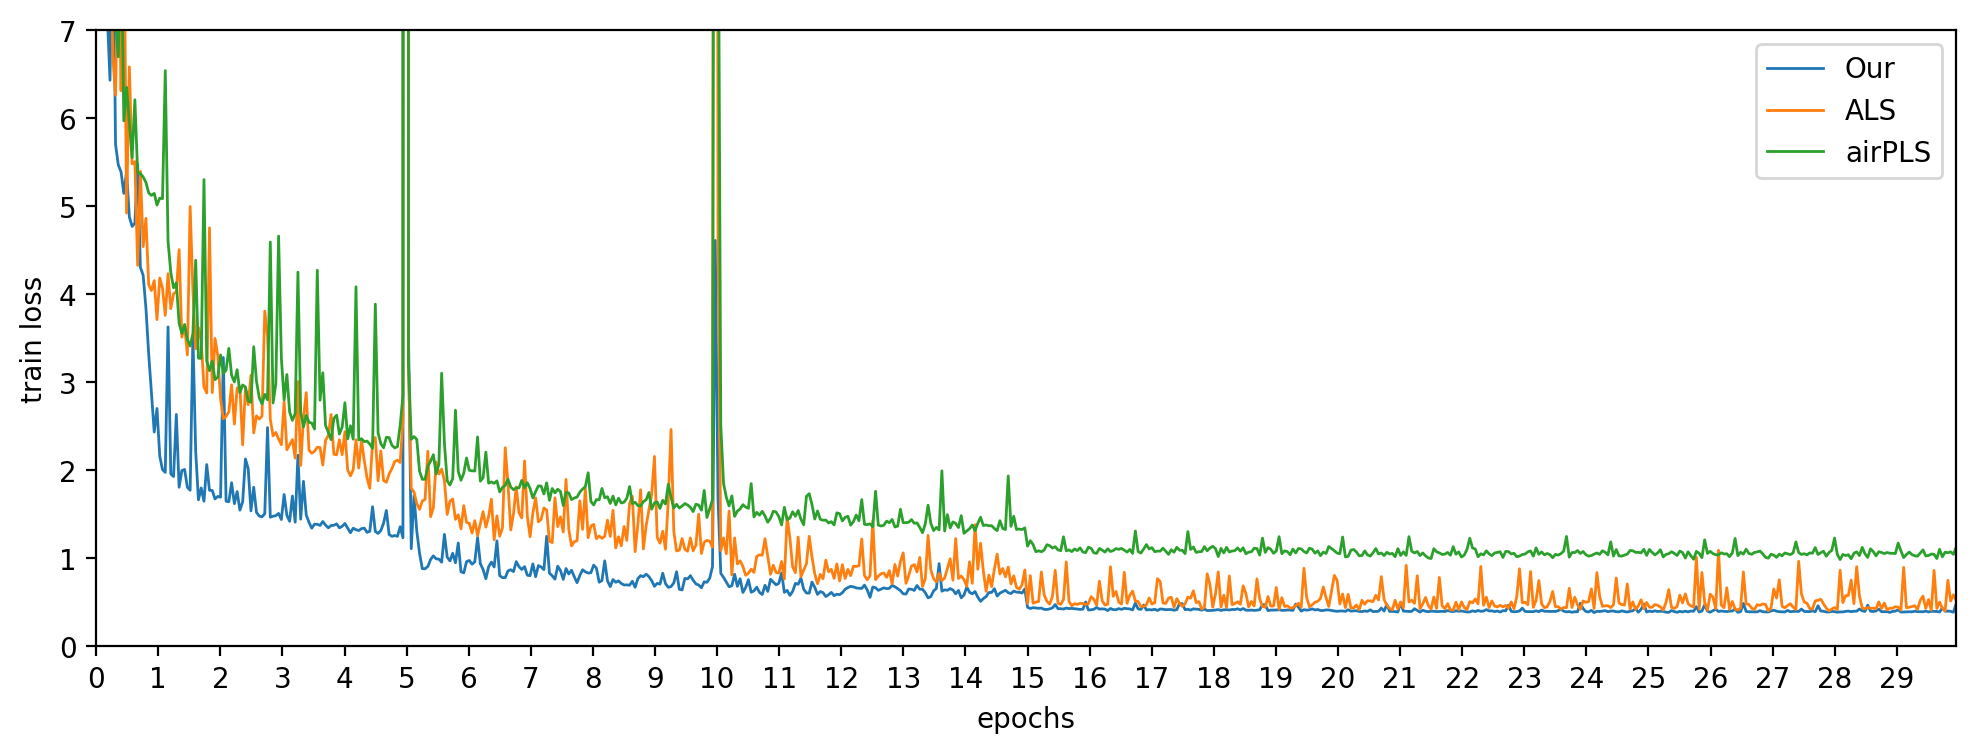

In [62]:
epochs = 30
error_name = 'train_loss'
smoothing = 2696 // 8
smoothing = 337
smoothing = 4*30
# smoothing = 1

error_Our = copy.copy(data_Our[error_name])
error_ALS = copy.copy(data_ALS[error_name])
error_airPLS = copy.copy(data_airPLS[error_name])

error_Our = np.array(error_Our).reshape(-1, smoothing)
error_Our = np.mean(error_Our, 1)

error_ALS = np.array(error_ALS).reshape(-1, smoothing)
error_ALS = np.mean(error_ALS, 1)

error_airPLS = np.array(error_airPLS).reshape(-1, smoothing)
error_airPLS = np.mean(error_airPLS, 1)

plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['lines.linewidth'] = 1

plt.plot(range(len(error_Our)), error_Our, label="Our")
plt.plot(range(len(error_ALS)), error_ALS, label="ALS")
plt.plot(range(len(error_airPLS)), error_airPLS, label="airPLS")

plt.xticks(ticks=np.linspace(0,len(error_ALS), epochs+1), labels=range(0,epochs+1))
plt.xlim(0,len(error_ALS)-1)
# plt.ylim(min(error_ALS)-10,max(error_ALS))
# plt.ylim(min(error_ALS)*0.9,max(error_ALS))
plt.ylim(0,7)
# plt.yscale("log")
plt.xlabel("epochs")
plt.ylabel(f"{error_name}")
plt.ylabel(f"train loss")
plt.legend()
plt.show()

In [69]:
data_Our['validation_loss'][-1] - np.mean(data_Our['train_loss'][-100:]), data_ALS['validation_loss'][-1] - np.mean(data_ALS['train_loss'][-100:]),  data_airPLS['validation_loss'][-1] - np.mean(data_airPLS['train_loss'][-100:])

(0.08702856, 0.3992151, 0.2224915)

(0.5888785, 0.93329275, 1.3477169)

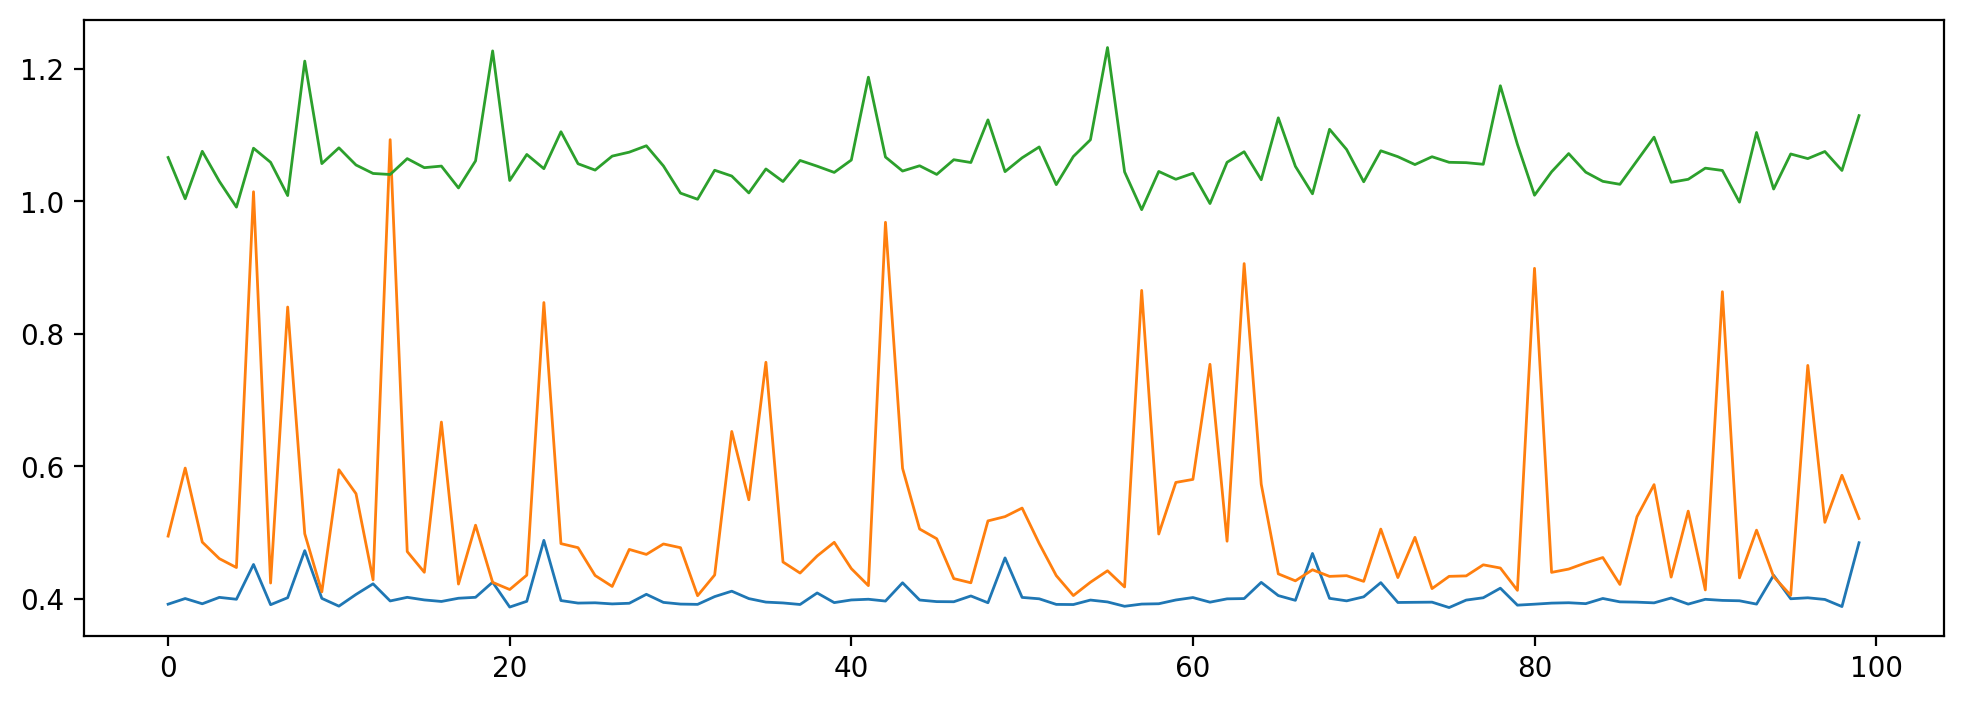

In [68]:
plt.plot(error_Our[-100:], label="Our")
plt.plot(error_ALS[-100:], label="ALS")
plt.plot(error_airPLS[-100:], label="airPLS")
data_Our['validation_loss'][-1], data_ALS['validation_loss'][-1], data_airPLS['validation_loss'][-1]